**Installing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d iamhungundji/dysarthria-detection
!unzip *.zip

100% 155M/155M [00:04<00:00, 40.0MB/s]
100% 155M/155M [00:04<00:00, 38.0MB/s]
Archive:  dysarthria-detection.zip
  inflating: torgo_data/data.csv     
  inflating: torgo_data/dysarthria_female/F01_Session1_0001.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0002.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0004.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0006.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0007.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0008.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0013.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0015.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0017.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0018.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0021.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0022.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_00

**Reading Data**

In [ ]:
df = pd.read_csv('/content/torgo_data/data.csv')

In [ ]:
df

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...
...,...,...,...
1995,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0144.wav
1996,dysarthria,male,torgo_data/dysarthria_male/M02_Session1_0005.wav
1997,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0040.wav
1998,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0260.wav


**Visualizing Waveplot, MFCC and Mel Spectrogram**

In [ ]:
def get_waveplot(path, target, gender):
  x, sr = librosa.load(path)
  plt.figure(figsize = (20,5))
  librosa.display.waveplot(x, sr = sr)
  plt.title('Waveplot of '+target+' '+gender)
  plt.show()

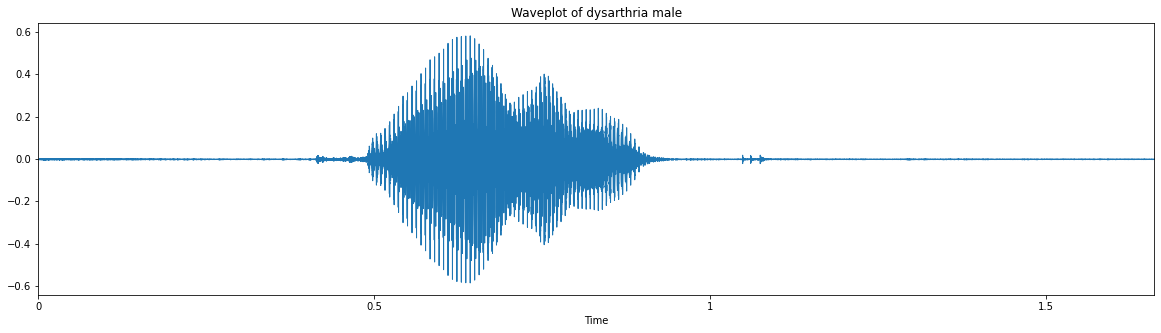

In [ ]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='male')]
get_waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

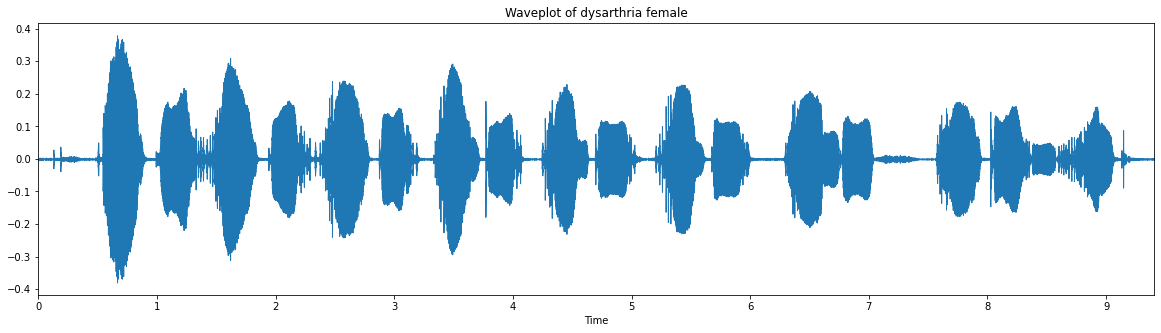

In [ ]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='female')]
get_waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

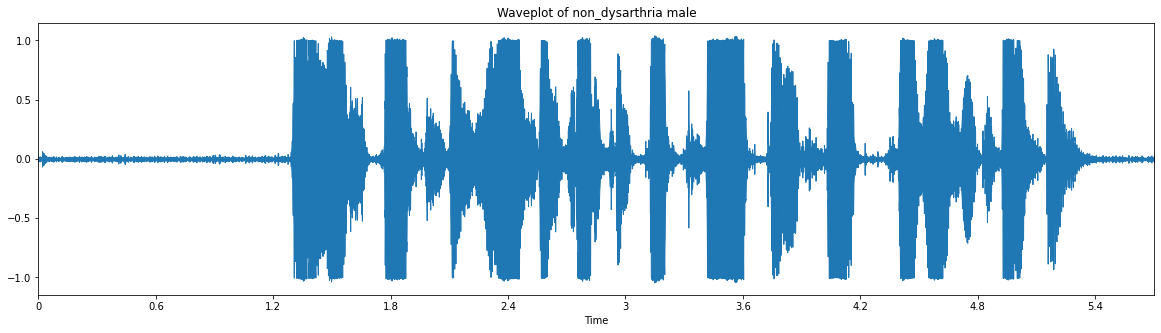

In [ ]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='male')]
get_waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

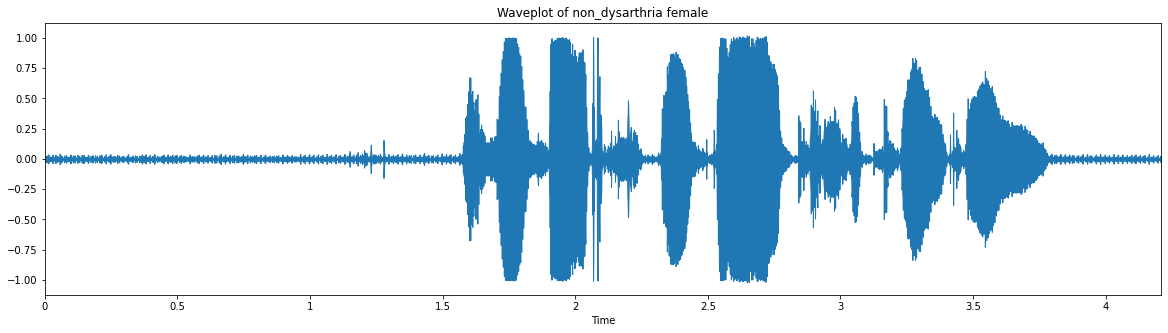

In [ ]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='female')]
get_waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

In [ ]:
def get_mfcc(path, target, gender):
  x, sr = librosa.load(path)
  mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=20)
  print(mfccs.shape)
  plt.figure(figsize=(20,5))
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')
  plt.title('MFCC Spectral of '+target+' '+gender)
  plt.show()

(20, 72)


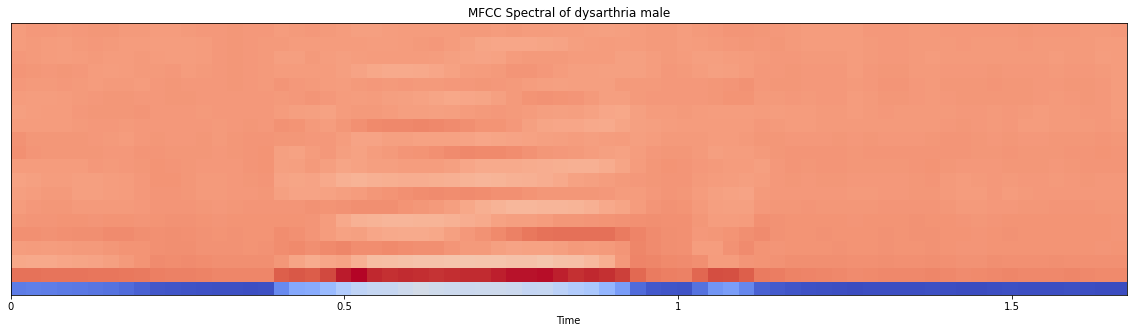

In [ ]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='male')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])


(20, 406)


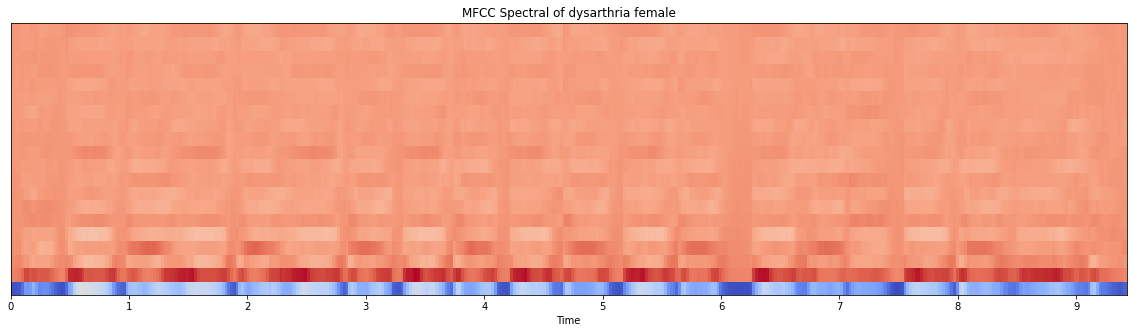

In [ ]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='female')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(20, 246)


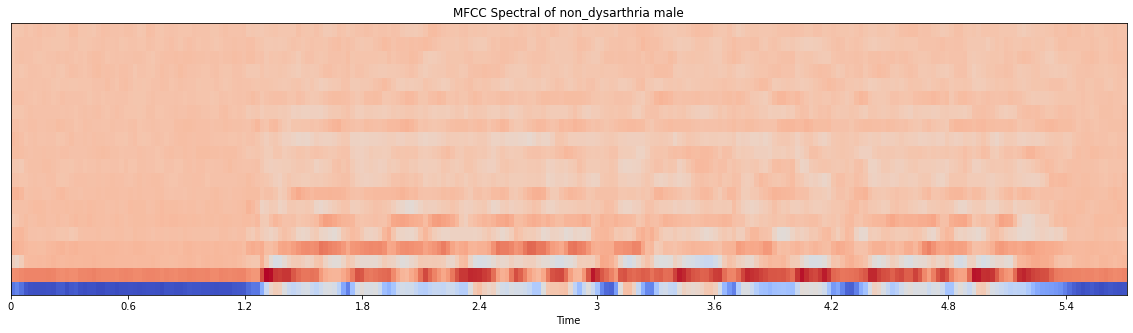

In [ ]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='male')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(20, 182)


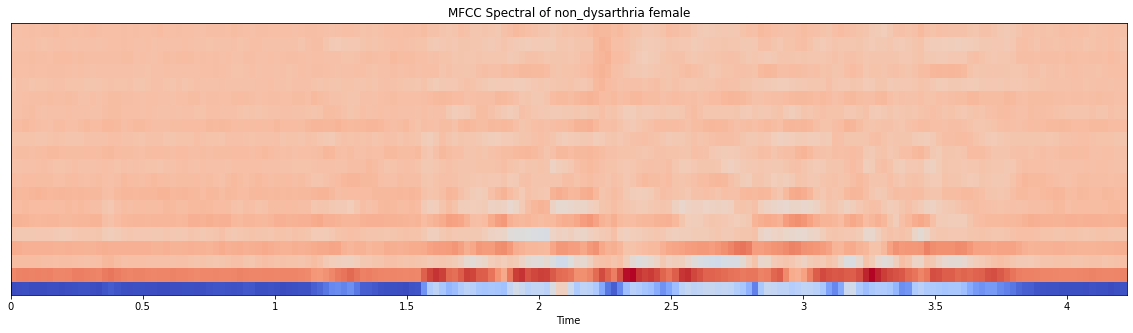

In [ ]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='female')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

In [ ]:
def get_melspec(path, target, gender):
  x, sr = librosa.load(path)
  melspec = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
  print(melspec.shape)
  plt.figure(figsize=(20,5))
  librosa.display.specshow(melspec, sr=sr, x_axis='time')
  plt.title('Mel Spectrogram of '+target+' '+gender)
  plt.show()

(128, 72)


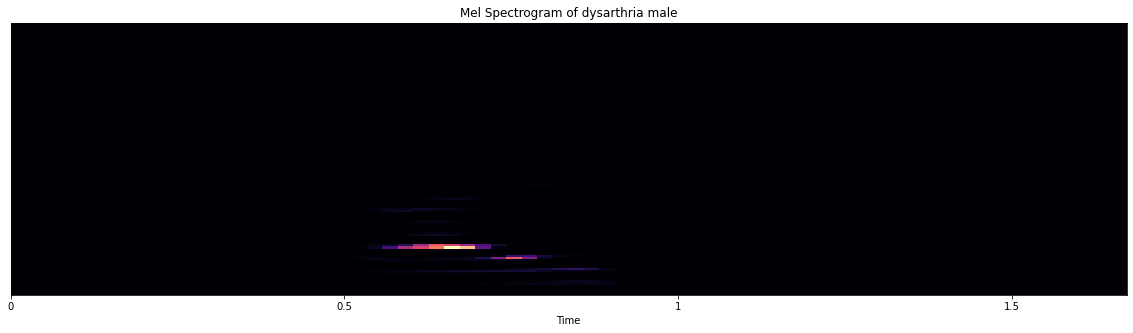

In [ ]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='male')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(128, 406)


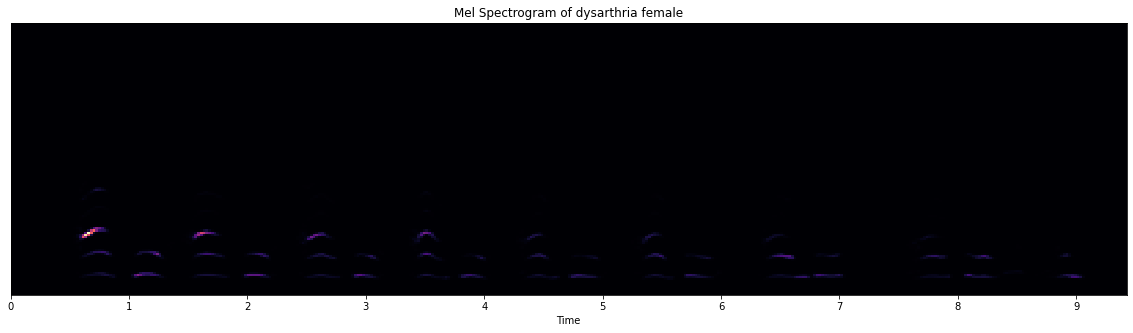

In [ ]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='female')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(128, 246)


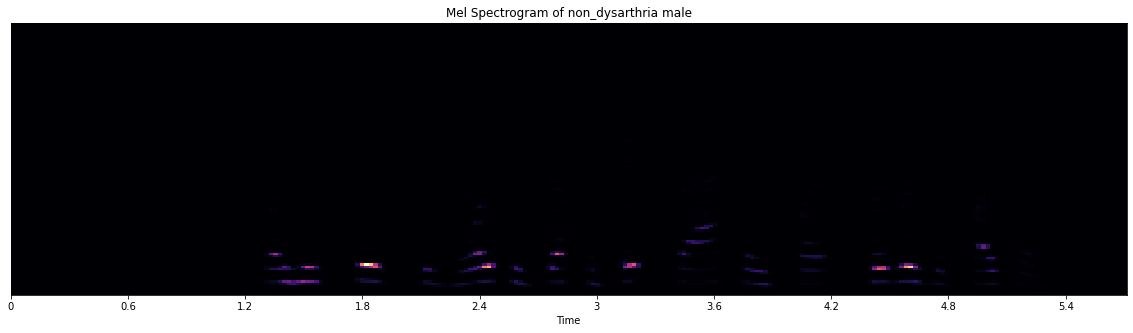

In [ ]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='male')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(128, 182)


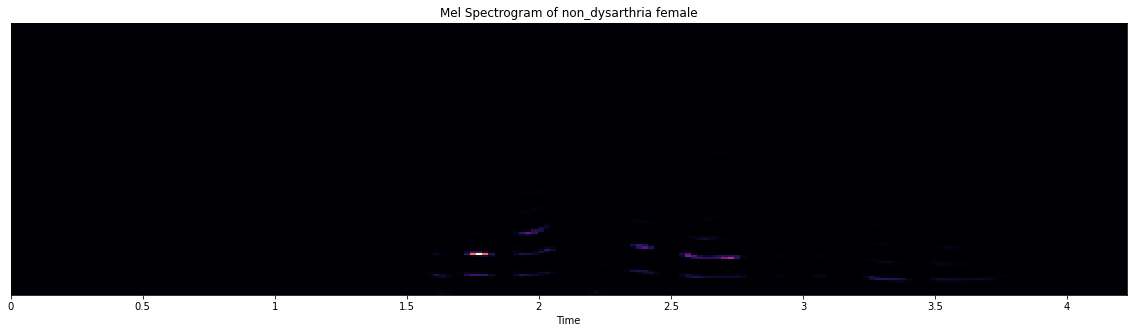

In [ ]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='female')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

**Defining a Function to create 256 MFCC features for any given audio file**

In [ ]:
def create_mfcc_features(path):
  mfccs=[]
  try:
    x, sr = librosa.load(path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=256)
    mfccs = np.mean(mfccs.T, axis=0)
  except:
    print('Error found in audio')
  return mfccs

**Applying the Function to all Audio Files **

In [ ]:
%%time

x_df = pd.DataFrame(df['filename'].apply(lambda x:create_mfcc_features(x)).tolist())

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error found in audio


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=209
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=583
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=581
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=185
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=946
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=214
  n_fft, y.shape[-1]


CPU times: user 1min 25s, sys: 1min 7s, total: 2min 32s
Wall time: 1min 19s


In [ ]:
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-224.202225,104.766289,-19.249100,39.976105,-13.658643,19.425083,-3.005526,7.105515,5.549227,-4.107284,...,1.382414,0.946646,0.779773,1.034225,0.417392,0.073569,0.560806,0.604964,0.170649,-0.222621
1,-301.802734,113.472832,-19.863441,40.374279,-16.921591,21.515228,4.499708,15.208834,7.142713,1.031963,...,1.247081,1.180266,1.058408,1.241004,0.026150,-1.417642,0.081231,0.036446,0.018918,-0.752195
2,-305.652679,116.443367,-27.130651,46.842144,-22.617197,24.739267,3.893429,14.112663,8.798301,0.695419,...,0.969411,0.873021,0.453568,1.044326,-0.004185,-1.480199,0.273740,0.217892,-0.205967,-0.590402
3,-214.418564,121.380379,-38.858505,39.850506,-27.386419,23.892429,-4.153133,8.637264,4.428192,-0.624779,...,1.117963,0.611449,0.945472,0.702243,0.212583,-0.102357,0.021461,0.346264,-0.056452,-0.267683
4,-283.125305,108.704826,-20.648291,46.923939,-15.770267,26.458565,-0.413044,12.762578,9.015738,-2.466657,...,1.457438,1.600919,0.916394,0.728466,0.549834,-0.164512,0.135451,-0.277304,-0.432144,-0.468542


In [ ]:
x_df.shape

(2000, 128)

In [ ]:
encoder = LabelEncoder()
encoder.fit(df['is_dysarthria'])
y = encoder.transform(df['is_dysarthria'])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
df_post_process=pd.concat([pd.DataFrame(x_df), pd.DataFrame(y)], axis=1)

In [ ]:
df_post_process=df_post_process.dropna()

In [ ]:
x_df=df_post_process.iloc[:,:-1]

In [ ]:
y=df_post_process.iloc[:,-1:]

**Split the Data into Training & Validation by a ratio of 90:10**

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(np.array(x_df), y, test_size=0.1)
x_train.shape, x_val.shape

((1799, 128), (200, 128))

In [ ]:
y_train

,0
595,0
440,1
1311,1
847,0
809,0
...,...
567,0
1907,0
281,1
559,0


**Reshaping MFCC Features for CNN**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val.reshape(x_val.shape[0], 16, 8, 1)

In [ ]:
len(df['is_dysarthria'].unique())

2

**Building a CNN Model**

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 8)          0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 8)           0         
                                                                 
 flatten (Flatten)           (None, 64)                0

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.99)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])
x_train.shape, y_train.shape

((1799, 16, 8, 1), (1799, 1))

In [ ]:
history = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
57/57 [==============================] - 14s 9ms/step - loss: 9.4067 - accuracy: 0.4742 - recall: 0.2800
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 6.5157 - accuracy: 0.4903 - recall: 0.3142
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 4.7949 - accuracy: 0.5114 - recall: 0.3649
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 3.6260 - accuracy: 0.5164 - recall: 0.3826
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 2.6701 - accuracy: 0.5275 - recall: 0.4443
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 2.0049 - accuracy: 0.5158 - recall: 0.4498
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 1.5332 - accuracy: 0.5181 - recall: 0.4598
Epoch 8/50
57/57 [==============================] - 0s 4ms/step - loss: 1.0729 - accuracy: 0.5514 - recall: 0.5447
Epoch 9/50
57/57 [==============================] - 0s 4ms/step - loss: 0.8767 

In [ ]:
opt2 = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.8,beta_2=0.85)
model.compile(optimizer=opt2, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

In [ ]:
history = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
57/57 [==============================] - 1s 8ms/step - loss: 0.4887 - accuracy: 0.7432 - recall_1: 0.8004
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4602 - accuracy: 0.7588 - recall_1: 0.8324
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4556 - accuracy: 0.7949 - recall_1: 0.8589
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4152 - accuracy: 0.8099 - recall_1: 0.8423
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3980 - accuracy: 0.8227 - recall_1: 0.8479
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3830 - accuracy: 0.8332 - recall_1: 0.8368
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 0.3764 - accuracy: 0.8344 - recall_1: 0.8368
Epoch 8/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3484 - accuracy: 0.8471 - recall_1: 0.8512
Epoch 9/50
57/57 [==============================] - 0s 4ms/step 

**Evaluating Model**

In [ ]:
model.evaluate(x_val, y_val)

7/7 [==============================] - 0s 10ms/step - loss: 0.0567 - accuracy: 0.9800 - recall_1: 0.9892


[0.05674079433083534, 0.9800000190734863, 0.9892473220825195]

In [ ]:
y_pred = model.predict(x_val)

AUC ROC Score

In [ ]:
from sklearn.metrics import roc_auc_score,recall_score,confusion_matrix
roc_auc_score(y_val, y_pred)

0.9992965531102401

In [ ]:
pred_val = np.round(y_pred)

**Recall Score**

In [ ]:
print(recall_score(y_val,  pred_val))

0.989247311827957


**Confusion Matrix**

In [ ]:
pd.DataFrame(confusion_matrix(y_val,pred_val),columns=np.sort(df['is_dysarthria'].unique()),index=np.sort(df['is_dysarthria'].unique()))


,dysarthria,non_dysarthria
dysarthria,104,3
non_dysarthria,1,92
